# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("protests.csv")

In [3]:
# Display all columns

pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [5]:
# Setting up target columns

dummy_drops = ['1_accomodation', '1_arrests', '1_beatings',
       '1_crowd dispersal', '1_ignore', '1_killings', '1_shootings',
       '2_accomodation', '2_arrests', '2_beatings', '2_crowd dispersal',
       '2_ignore', '2_killings', '2_shootings', '3_accomodation', '3_arrests',
       '3_beatings', '3_crowd dispersal', '3_ignore', '3_killings',
       '3_shootings', '4_accomodation', '4_arrests', '4_beatings',
       '4_crowd dispersal', '4_killings', '4_shootings', '5_.',
       '5_accomodation', '5_arrests', '5_beatings', '5_crowd dispersal',
       '5_killings', '5_shootings', '6_accomodation', '6_arrests',
       '6_beatings', '6_crowd dispersal', '6_killings', '7_.',
       '7_accomodation', '7_arrests', '7_beatings', '7_killings']

response = ["stateresponse1", "stateresponse2", "stateresponse3", "stateresponse4", "stateresponse5", "stateresponse6", "stateresponse7"]

#If there are no notes, then we will not be able to predict the outcome very well.
df.dropna(subset=["notes"], inplace=True) 

#For translating the vertical state response values laterally.
df = pd.get_dummies(data=df, prefix=["1", "2", "3", "4", "5", "6", "7"], columns=response)


#Combining the disparate dummies into unified response columns.  
#Unfortunately there was a certain amount of manual labor involved in this due to how finicky pandas is.
df["y_accomodation"] = df['1_accomodation'] + df['2_accomodation'] + df['3_accomodation'] + df['4_accomodation'] + df['5_accomodation'] + df['6_accomodation'] + df['7_accomodation']
df["y_arrests"] = df['1_arrests'] + df['2_arrests'] + df['3_arrests'] + df['4_arrests'] + df['5_arrests'] + df['6_arrests'] + df['7_arrests']
df["y_beatings"] = df['1_beatings'] + df['2_beatings'] + df['3_beatings'] + df['4_beatings'] + df['5_beatings'] + df['6_beatings'] + df['7_beatings']
df["y_crowd dispersal"] = df['1_crowd dispersal'] + df['2_crowd dispersal'] + df['3_crowd dispersal'] + df['4_crowd dispersal'] + df['5_crowd dispersal'] + df['6_crowd dispersal']
df["y_ignore"] = df['1_ignore'] + df['2_ignore'] + df['3_ignore']
df["y_killings"] = df['1_killings'] + df['2_killings'] + df['3_killings'] + df['4_killings'] + df['5_killings'] + df['6_killings'] + df['7_killings']
df["y_shootings"] = df['1_shootings'] + df['2_shootings'] + df['3_shootings'] + df['4_shootings'] + df['5_shootings']

#Getting rid of the disparate dummies now that we have unified responses.
df.drop(columns=dummy_drops, inplace=True)

In [6]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,sources,notes,y_accomodation,y_arrests,y_beatings,y_crowd dispersal,y_ignore,y_killings,y_shootings
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...,0,0,0,0,1,0,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...,0,0,0,0,1,0,0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema...",0,0,0,0,1,0,0
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...,1,0,0,0,0,0,0
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...,1,1,0,1,0,0,0


In [7]:
df['year'] = df['year'].astype(int)
df['startyear'] = df['startyear'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14468 entries, 0 to 16360
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14468 non-null  int64  
 1   country                14468 non-null  object 
 2   ccode                  14468 non-null  int64  
 3   year                   14468 non-null  int64  
 4   region                 14468 non-null  object 
 5   protest                14468 non-null  int64  
 6   protestnumber          14468 non-null  int64  
 7   startday               14468 non-null  float64
 8   startmonth             14468 non-null  float64
 9   startyear              14468 non-null  int64  
 10  endday                 14468 non-null  float64
 11  endmonth               14468 non-null  float64
 12  endyear                14468 non-null  float64
 13  protesterviolence      14468 non-null  float64
 14  location               14447 non-null  object 
 15  pa

In [9]:
df.describe()

,id,ccode,year,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,y_accomodation,y_arrests,y_beatings,y_crowd dispersal,y_ignore,y_killings,y_shootings
count,1.446800e+04,14468.000000,14468.000000,14468.0,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000
mean,4.292593e+09,429.058750,2005.697401,1.0,8.084048,15.453829,6.160976,2005.697332,15.577620,6.178463,2005.700097,0.263132,0.103539,0.139480,0.053290,0.306193,0.549281,0.053152,0.059925
std,2.345207e+09,234.520679,8.699182,0.0,12.064508,8.830454,3.455532,8.699088,8.816642,3.455823,8.700431,0.440349,0.307157,0.347057,0.224926,0.465553,0.497722,0.224959,0.237357
min,2.019900e+08,20.000000,1990.000000,1.0,1.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.201992e+09,220.000000,1998.000000,1.0,2.000000,8.000000,3.000000,1998.000000,8.000000,3.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.732002e+09,373.000000,2007.000000,1.0,4.000000,15.000000,6.000000,2007.000000,16.000000,6.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.452004e+09,645.000000,2014.000000,1.0,9.000000,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.102017e+09,910.000000,2019.000000,1.0,143.000000,31.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000


---
# EDA

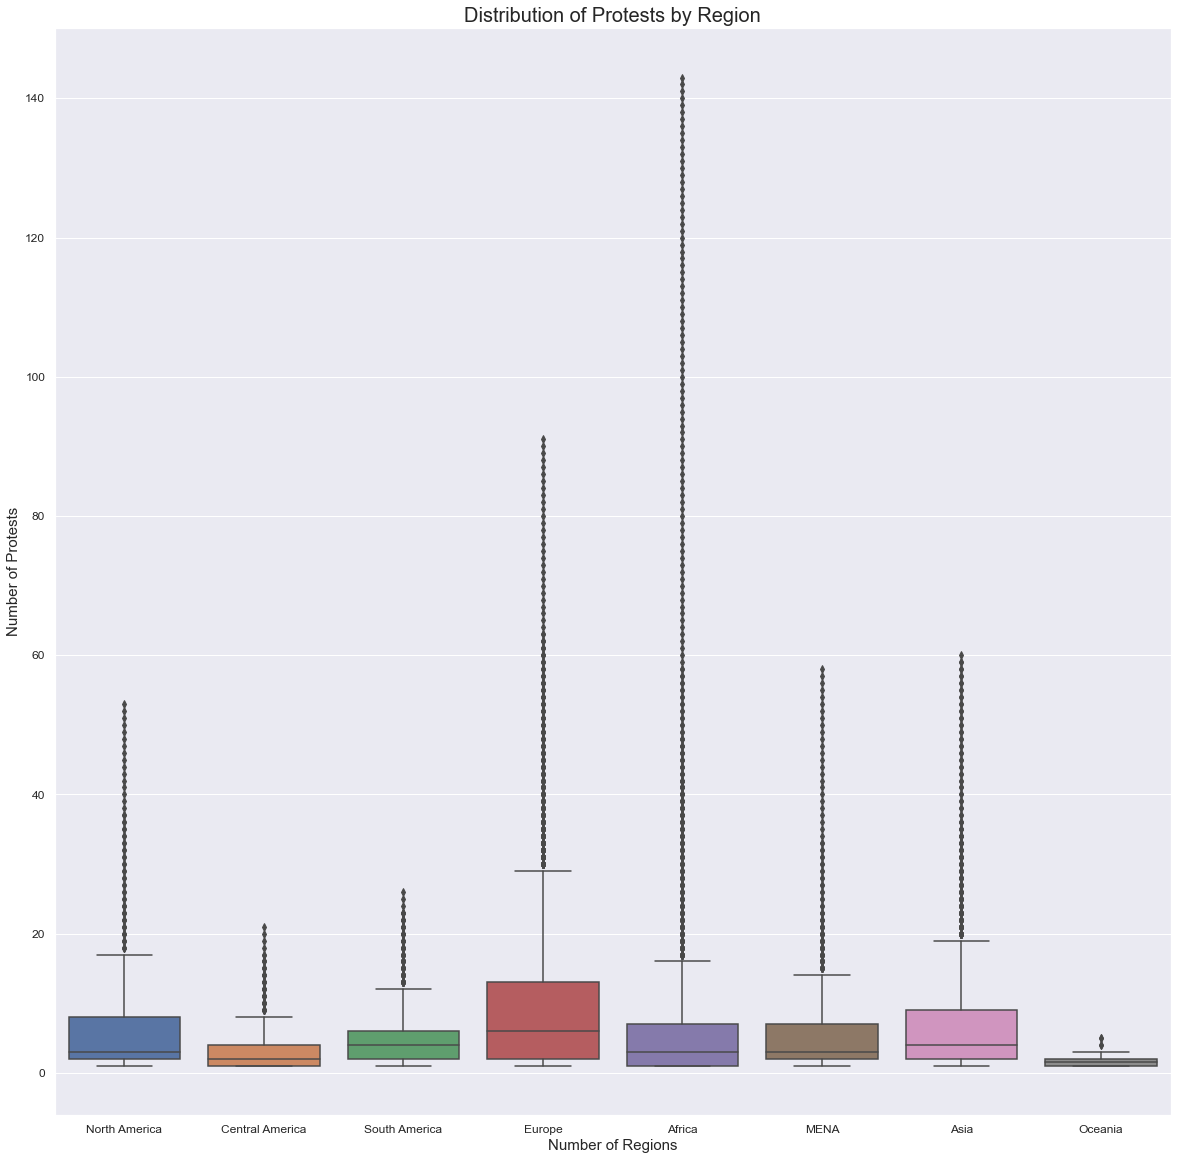

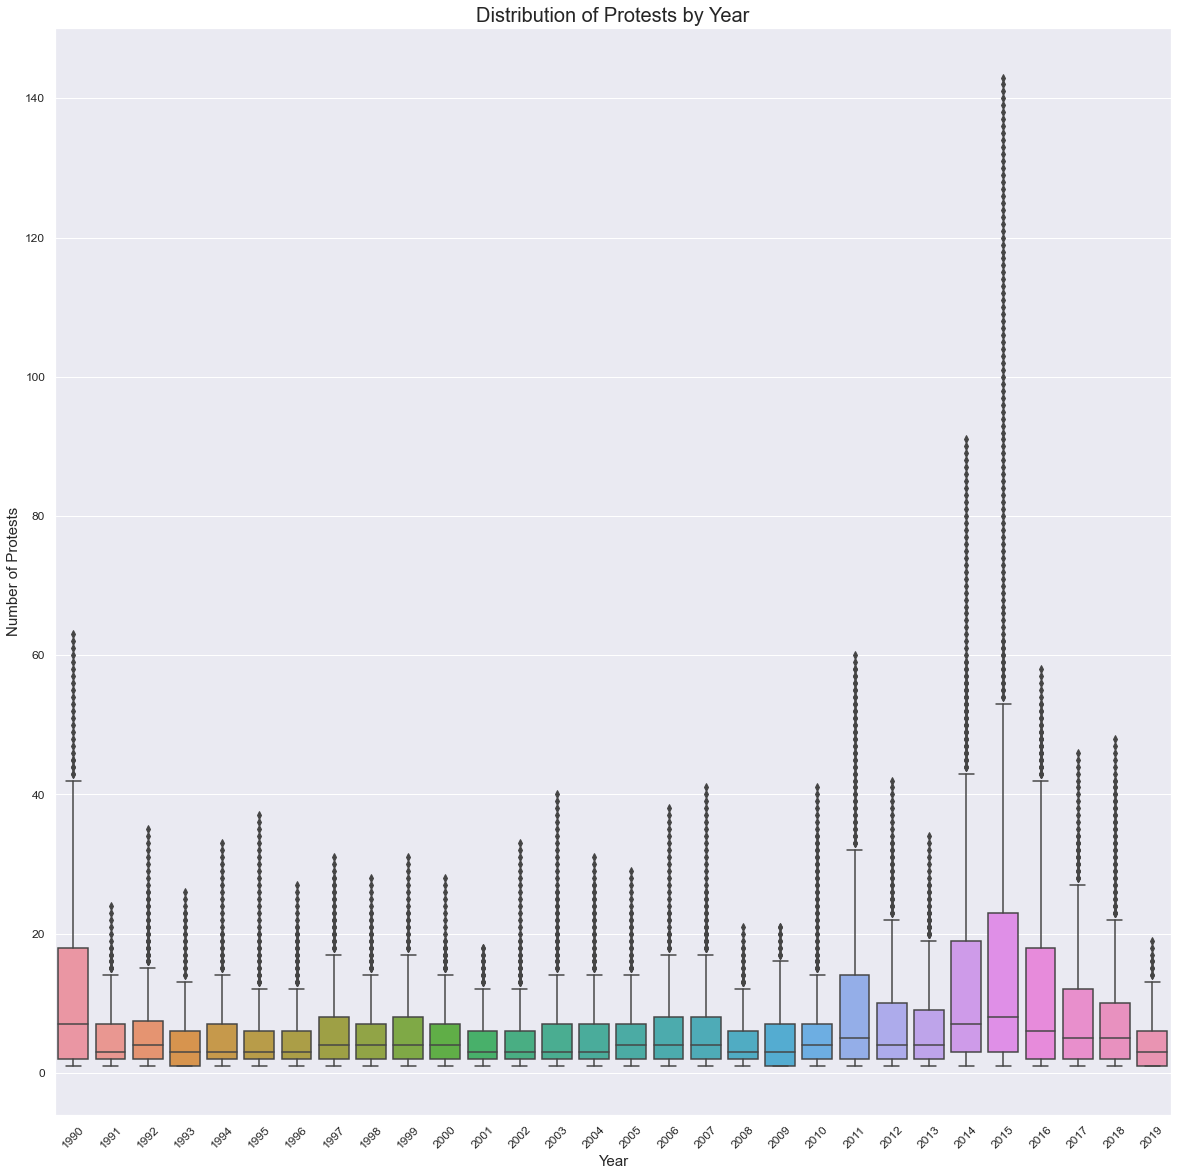

In [15]:
# Distribution of Protests by Region

plt.figure(figsize=(20,20))
plt.title('Distribution of Protests by Region', fontsize=20);
sns.boxplot(data=df, x='region', y='protestnumber')
plt.xlabel('Number of Regions',fontsize=15)
plt.ylabel('Number of Protests', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Distribution of Protests by Year

plt.figure(figsize=(20,20))
sns.histplot(data=df, x='startyear',y='protestnumber')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('Distribution of Protests by Year', fontsize=20)
sns.boxplot(data=df, x='startyear', y='protestnumber')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Protests', fontsize=15);

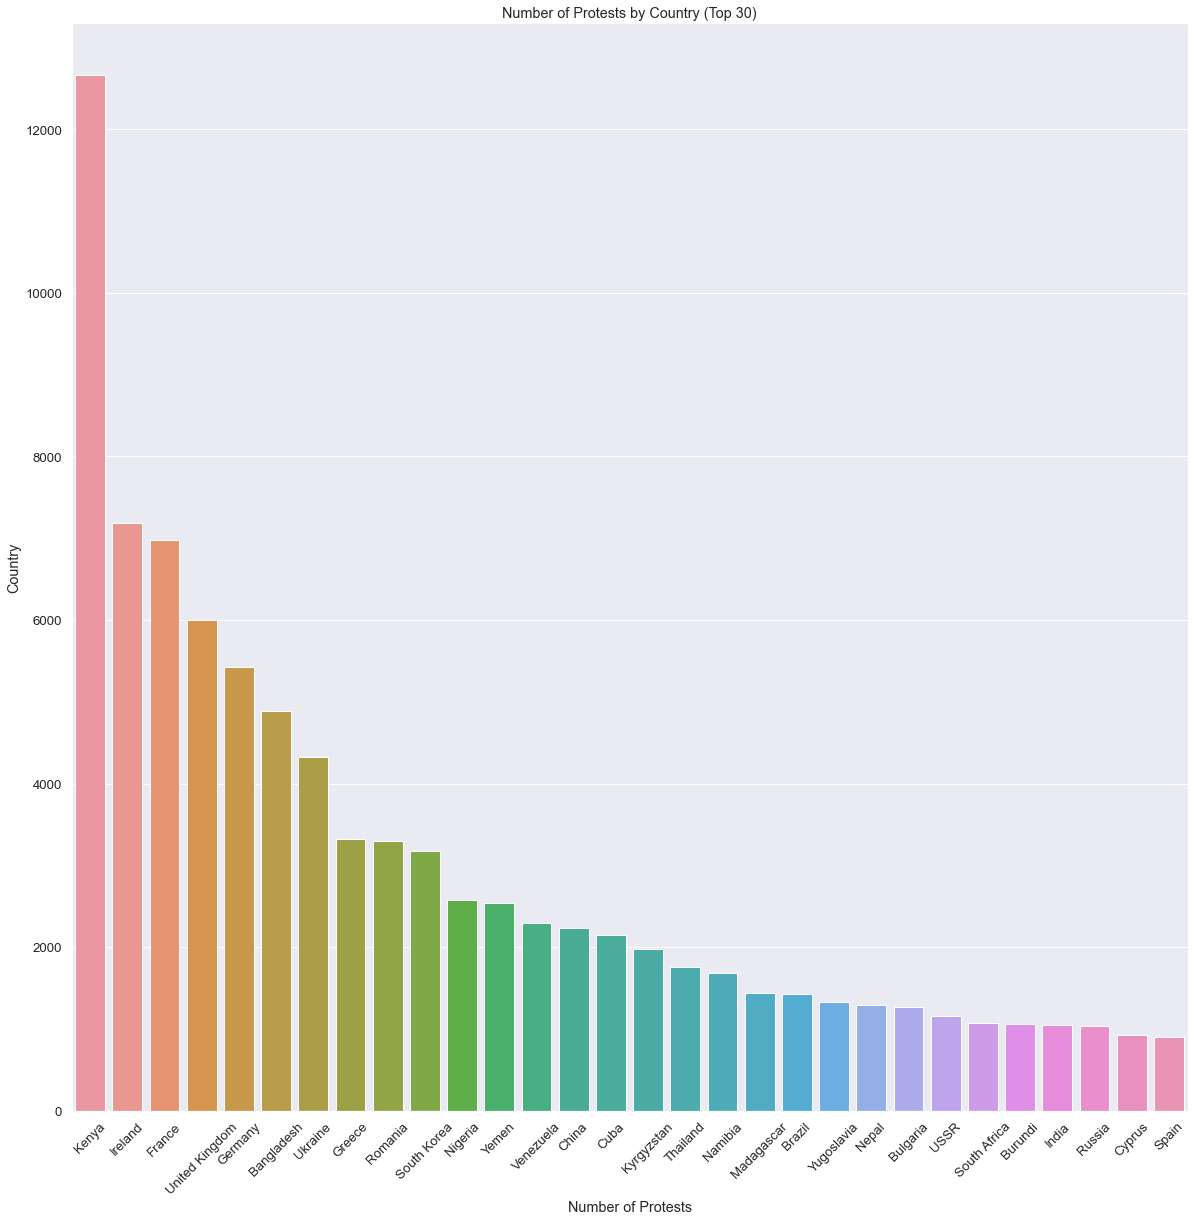

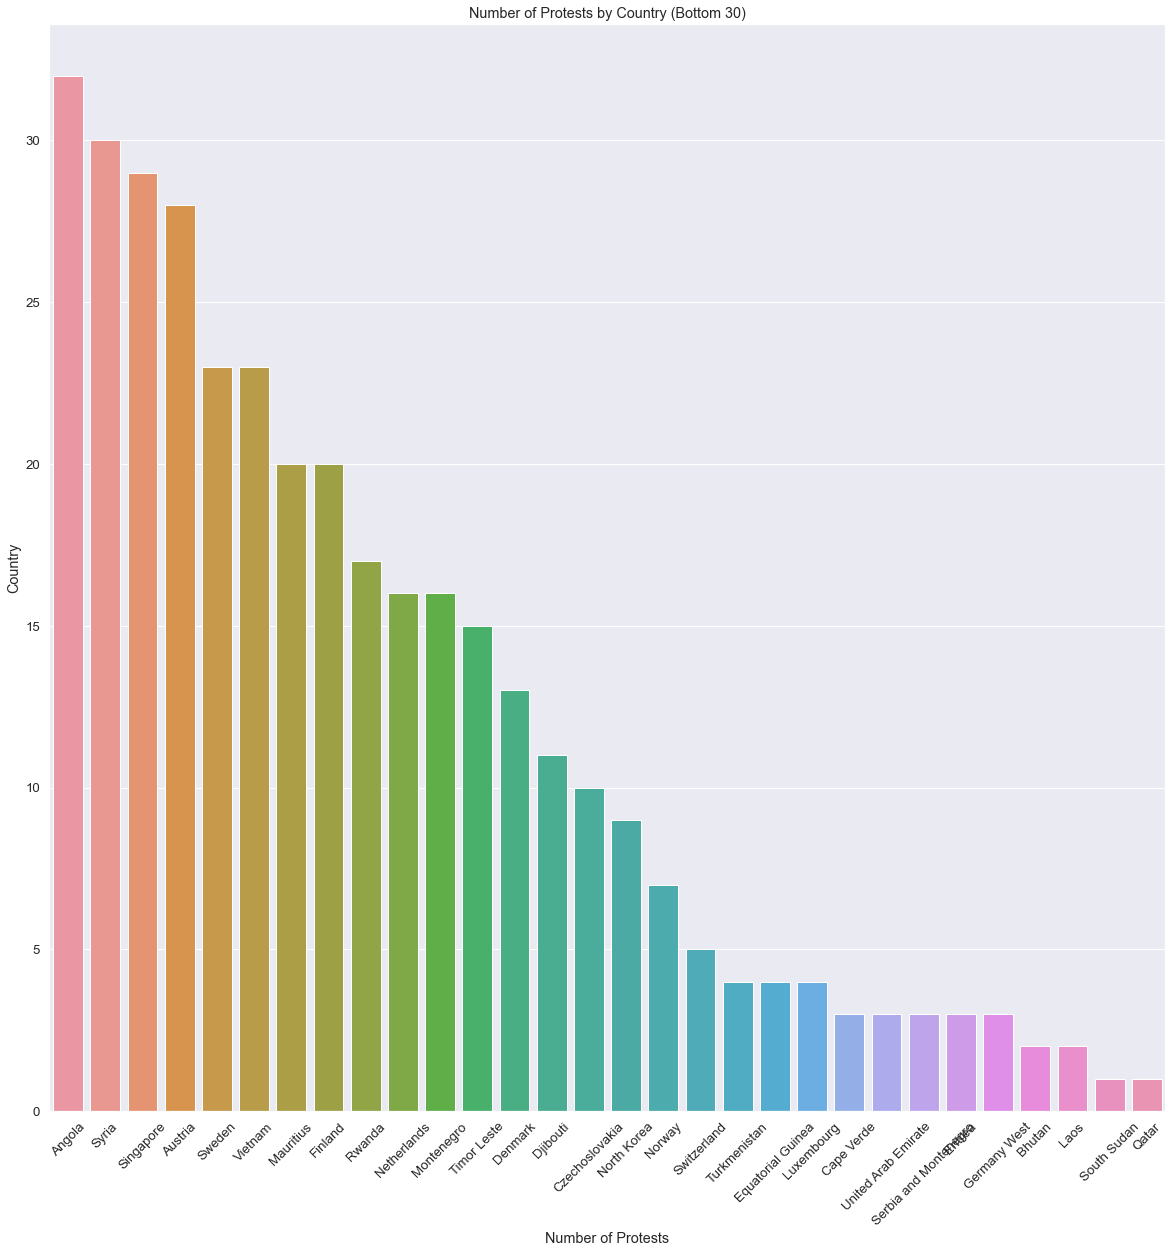

In [134]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.barplot(data=df.groupby('country')[['protestnumber']].sum().sort_values(by='protestnumber', ascending=False).head(30),
            x=df.groupby('country')[['country','protestnumber']].sum().sort_values(by='protestnumber', ascending=False).index[0:30],
            y='protestnumber')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.title('Number of Protests by Country (Top 30)');


sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.barplot(data=df.groupby('country')[['protestnumber']].sum().sort_values(by='protestnumber', ascending=False).tail(30),
            x=df.groupby('country')[['country','protestnumber']].sum().sort_values(by='protestnumber', ascending=False).index[-30::],
            y='protestnumber')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.title('Number of Protests by Country (Bottom 30)');

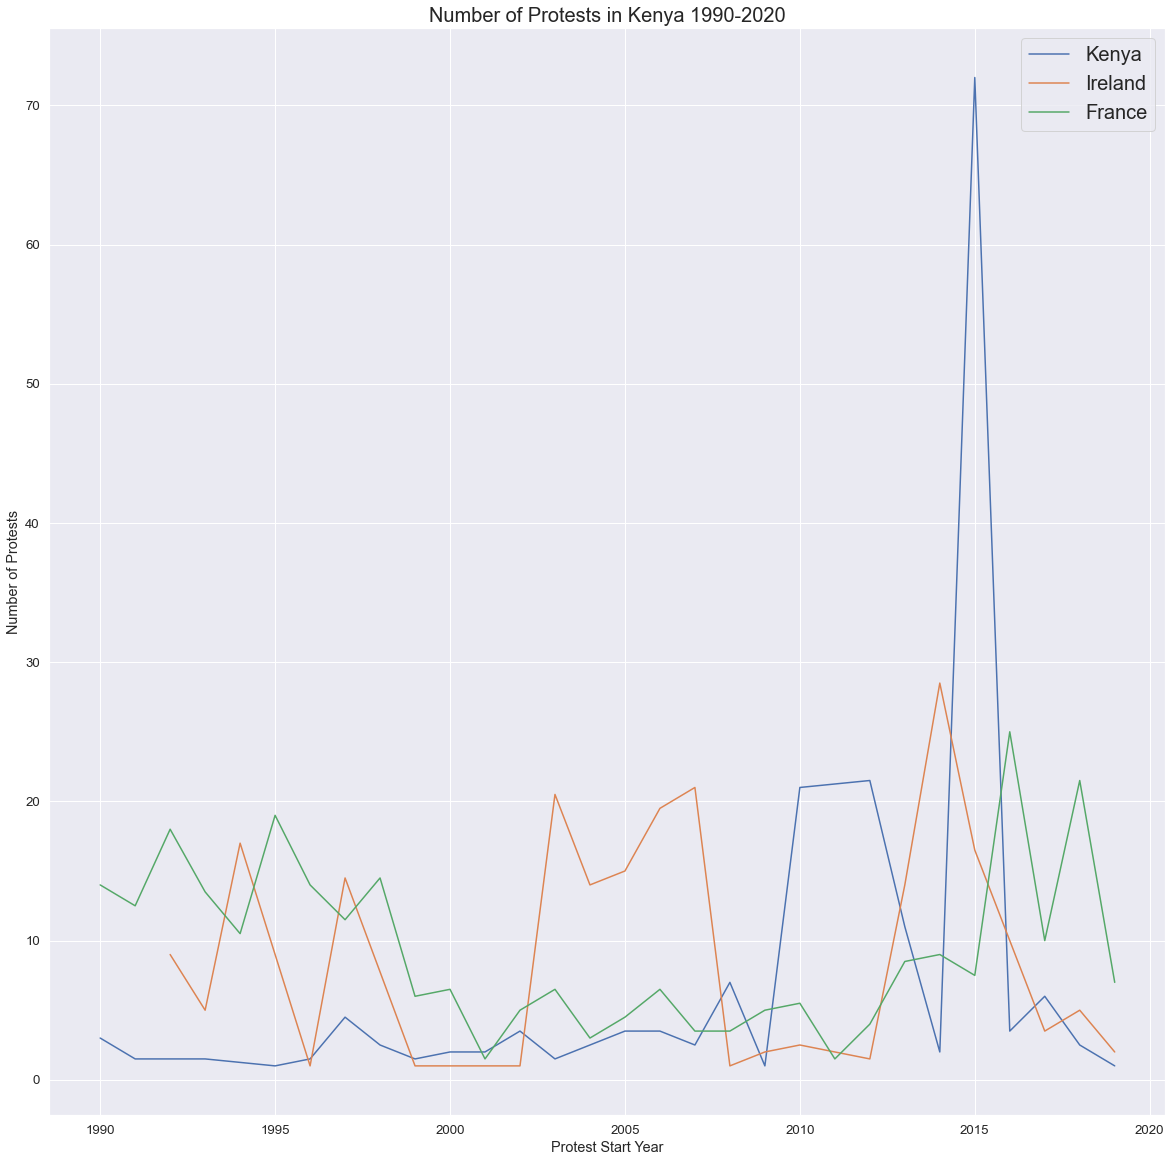

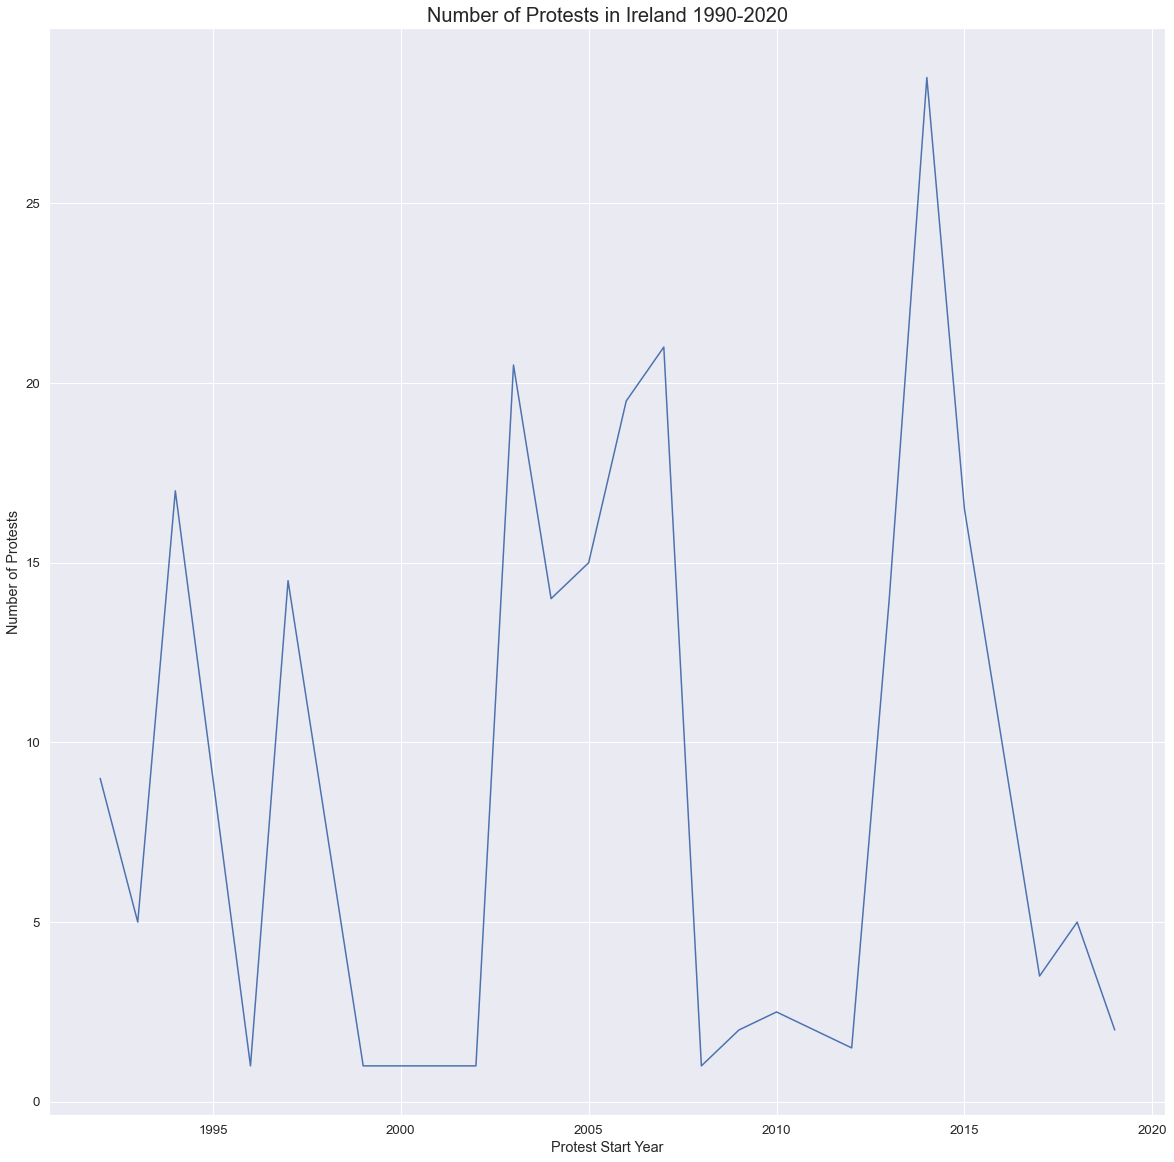

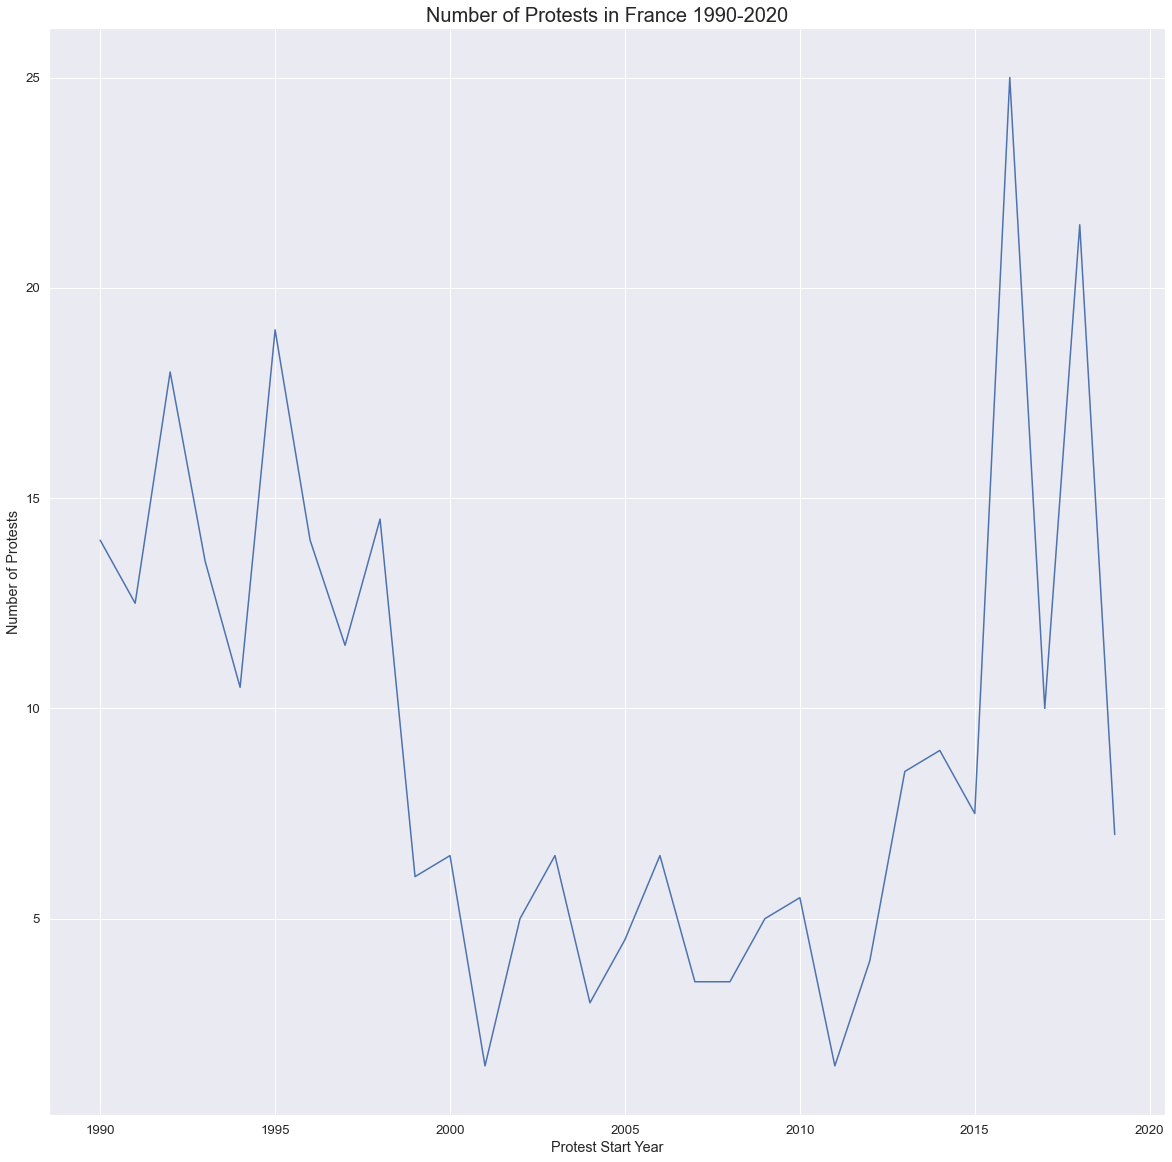

In [161]:
uk_df = df[df['country']=='Kenya']
ire_df = df[df['country']=='Ireland']
fra_df = df[df['country']=='France']

sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.lineplot(data=uk_df, x='startyear', y='protestnumber', ci=None, label='Kenya')
sns.lineplot(data=ire_df, x='startyear', y='protestnumber', ci=None, label='Ireland')
sns.lineplot(data=fra_df, x='startyear', y='protestnumber', ci=None, label='France')
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in Kenya 1990-2020', fontsize=20)
plt.legend(fontsize=20);

sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.lineplot(data=ire_df, x='startyear', y='protestnumber', ci=None)
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in Ireland 1990-2020', fontsize=20)

sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.lineplot(data=fra_df, x='startyear', y='protestnumber', ci=None)
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in France 1990-2020', fontsize=20);


**Since 2015, Kenya has experienced shortages of the staple food, maize, and other basic commodities such as sugar, leading to political and social tensions** Resource: (https://www.climatechangenews.com/2017/07/26/kenyas-food-crisis-drought-raises-prices-political-tensions/)

**The anti-austerity movement in Ireland saw majkor demonstrations from 2008 (the year of the Irish economic downturn) to 2015. Between 2008-2015, the Irish Stock Exchange crashed, country fell into recession, unemployment rate jumped record high, and etc. The slumping economy contributed to rise of political and social tensions which led to increase in demonstrations and protests** Resource: https://en.wikipedia.org/wiki/Anti-austerity_movement_in_Ireland



In [23]:
X = df['notes']

cv = CountVectorizer(stop_words='english')
X_cv = cv.fit_transform(X)
X_cv_1 = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names())


cv_2 = CountVectorizer(ngram_range=(,2),stop_words='english')
X_cv_bigram = cv_2.fit_transform(X)
X_cv_2 = pd.DataFrame(X_cv_bigram.todense(), columns=cv_2.get_feature_names())

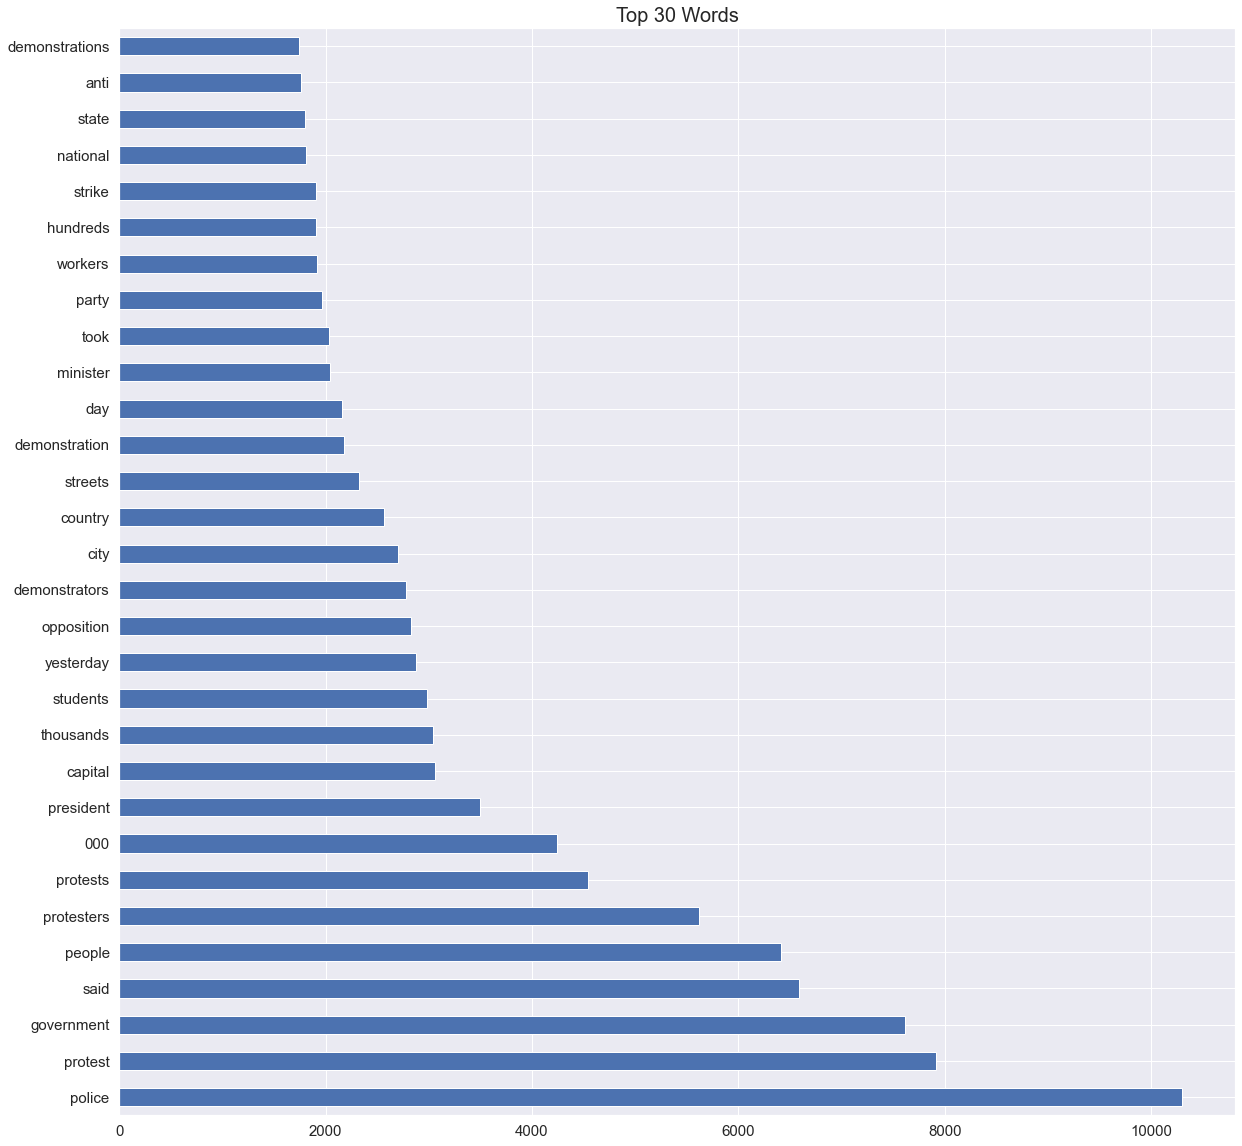

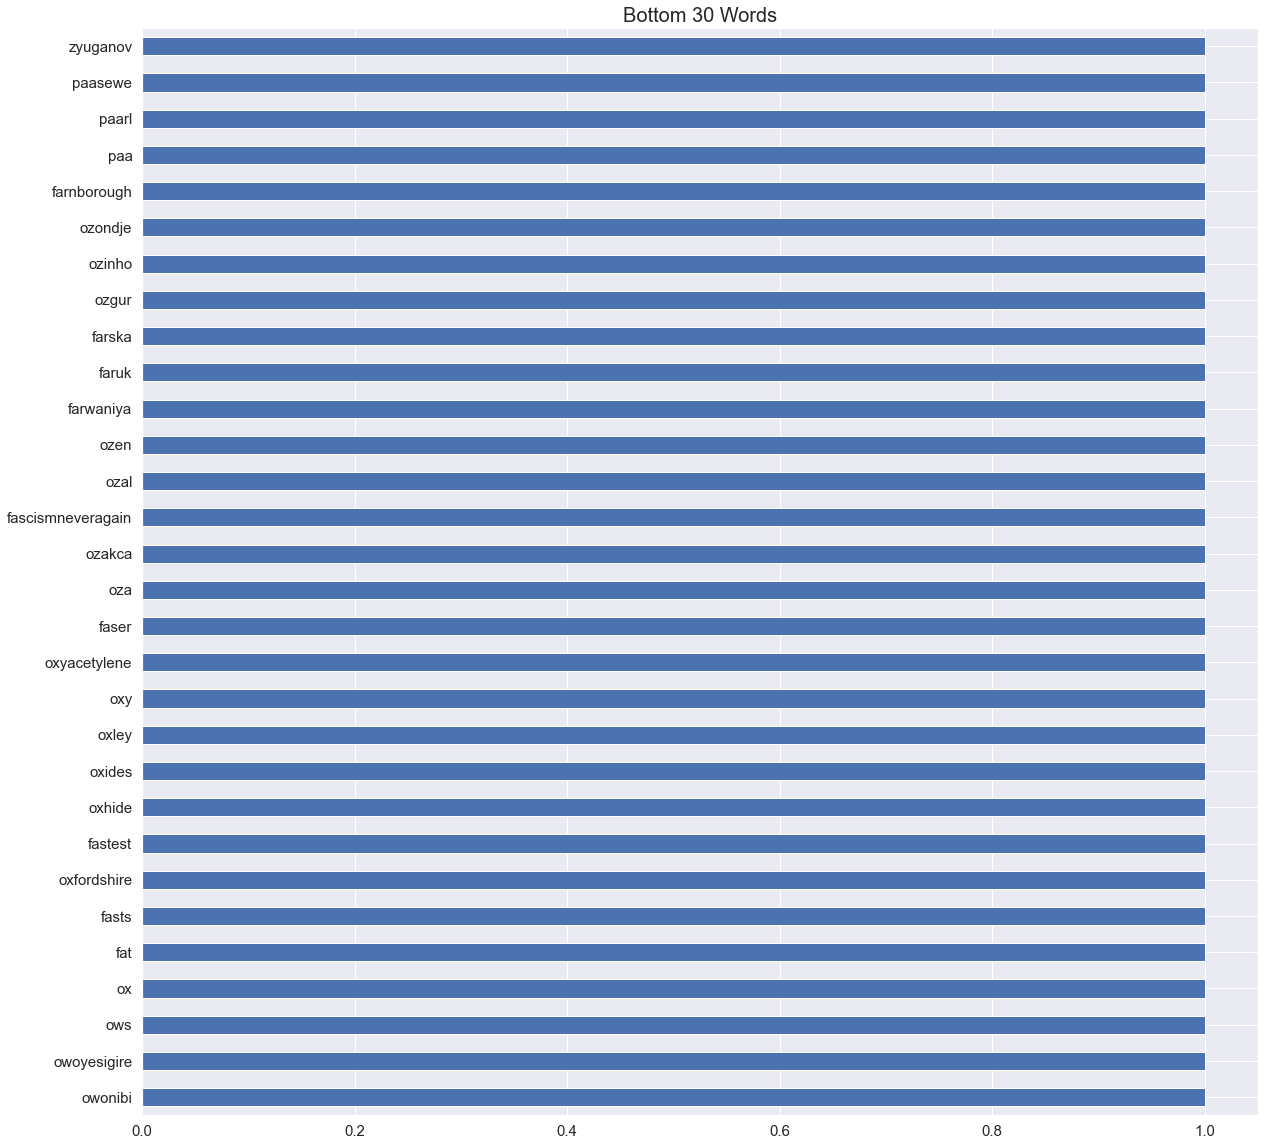

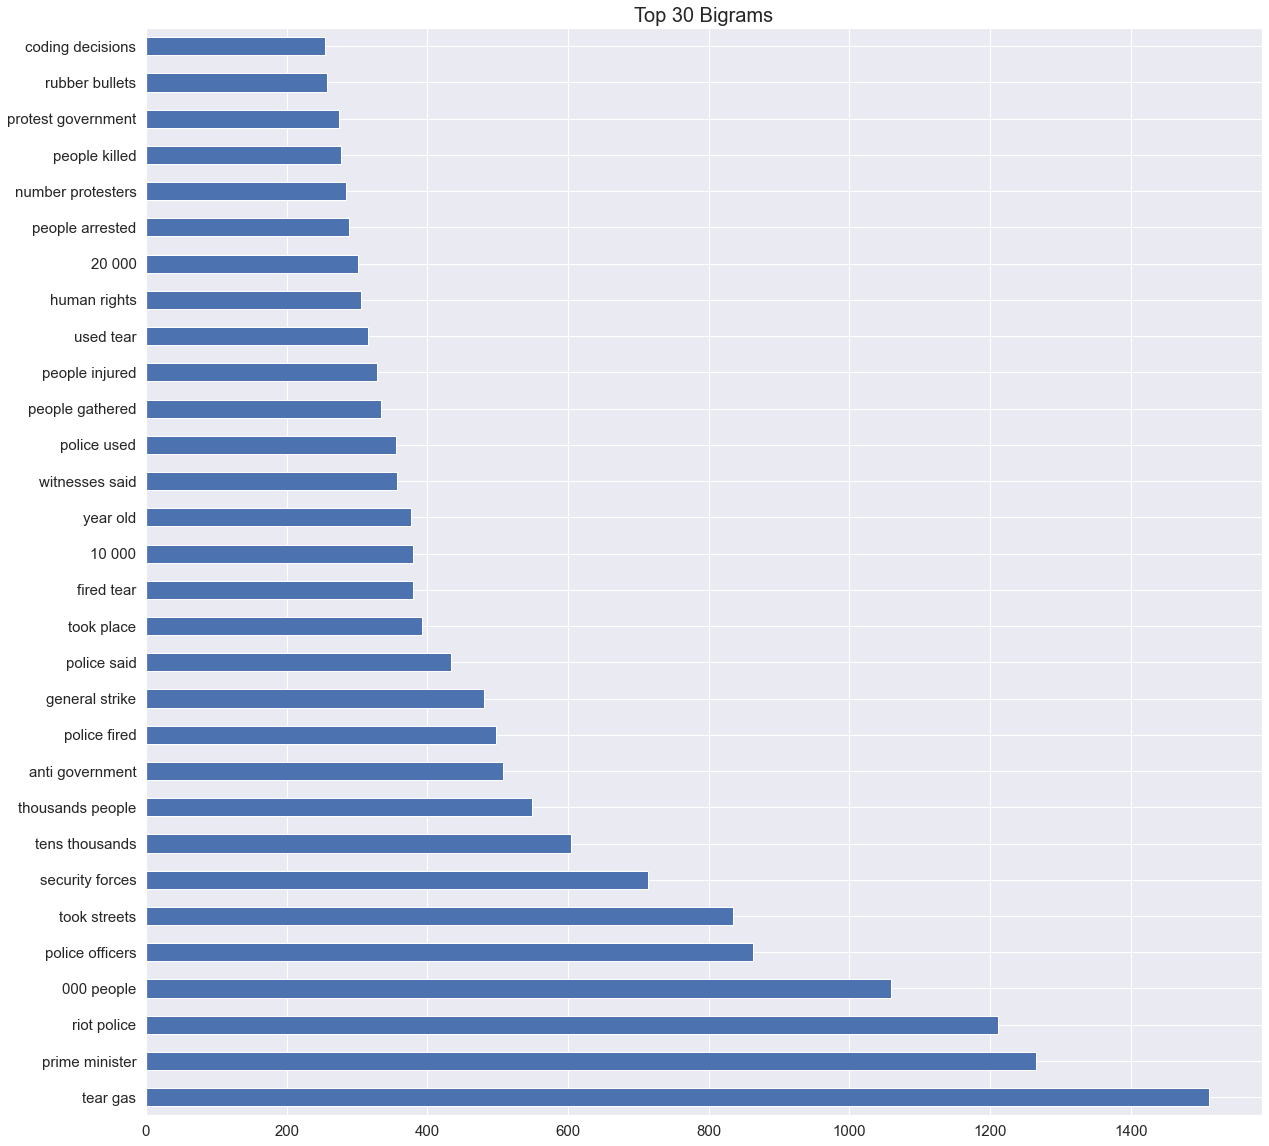

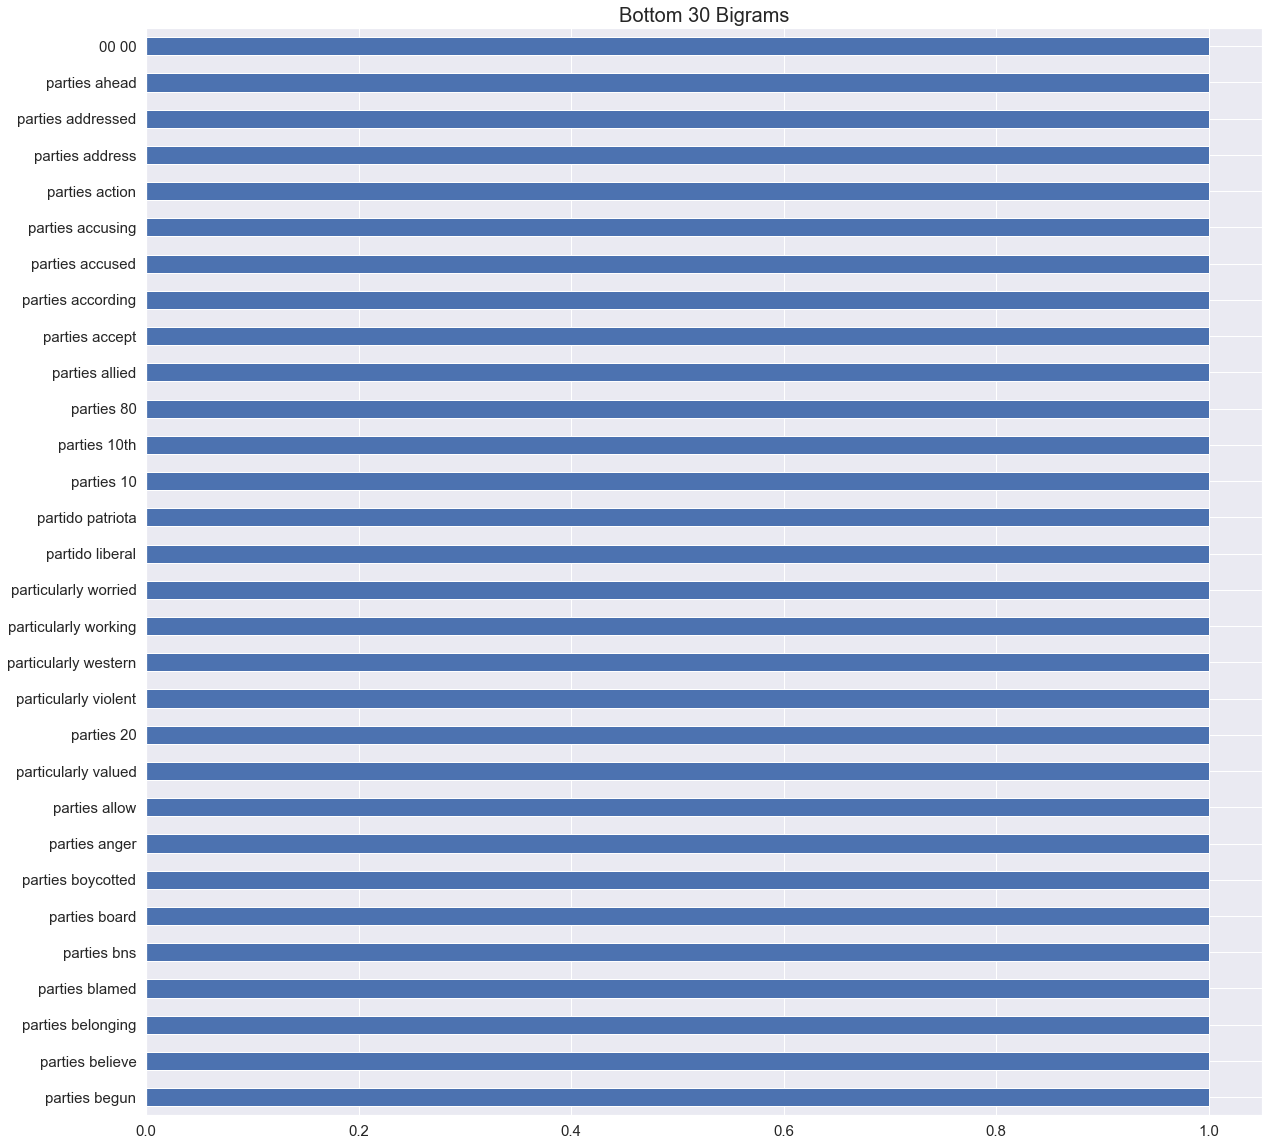

In [24]:
plt.figure(figsize=(20,20))
X_cv_1.sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Top 30 Words', fontsize=20)

plt.figure(figsize=(20,20))
X_cv_1.sum().sort_values(ascending=False).tail(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Bottom 30 Words', fontsize=20)

plt.figure(figsize=(20,20))
X_cv_2.sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Top 30 Bigrams', fontsize=20)

plt.figure(figsize=(20,20))
X_cv_2.sum().sort_values(ascending=False).tail(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Bottom 30 Bigrams', fontsize=20);